In [77]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import datetime

In [34]:
import os
os.getcwd()

'C:\\Users\\dmksk\\OneDrive\\Desktop\\CF\\Data Immersion\\Achivment 4\\4.9\\Instacart_Project\\03 Script'

In [35]:
# set path
path = r'C:\Users\dmksk\OneDrive\Desktop\CF\Data Immersion\Achivment 4\4.9\Instacart_Project'

In [36]:
# Import most up-to-date project data
instacart = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

### 03. Provide the Instacart senior stakeholders with descriptive findings about sales

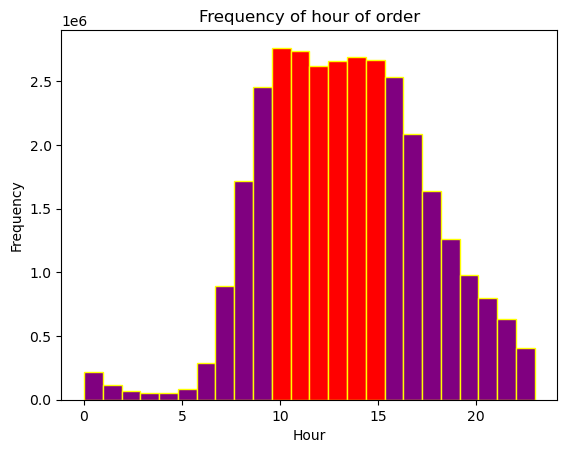

In [84]:
hist,bins,patches=plt.hist(instacart['order_hour_of_day'], bins=24 ,color='purple', edgecolor='yellow')
plt.title('Frequency of hour of order')
plt.ylabel('Frequency')
plt.xlabel('Hour')
patches[10].set_fc('red')
patches[11].set_fc('red')
patches[12].set_fc('red')
patches[13].set_fc('red')
patches[14].set_fc('red')
patches[15].set_fc('red')
# Save chart
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour.png'))

###### + Peak Ordering Times: The middle part of the histogram, where the frequency is highest, suggests the busiest hours for Instacart orders. This is likely when people are most active in placing orders.
###### + Off-Peak Times: The lower frequency at the beginning and end of the 24-hour period indicates quieter times, probably when fewer people are ordering groceries.
###### + Patterns and Trends: This distribution can reflect common shopping behaviors, such as more orders around lunch or early evening when people might be planning meals, and fewer orders in the early morning and late night.

### 04. The marketing team is curious about the distribution of orders among customers in terms of loyalty

In [38]:
# customer count
customer_counts = instacart['loyalty_flag'].value_counts()

print(customer_counts)  # This will print the count for each customer type


loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: count, dtype: int64


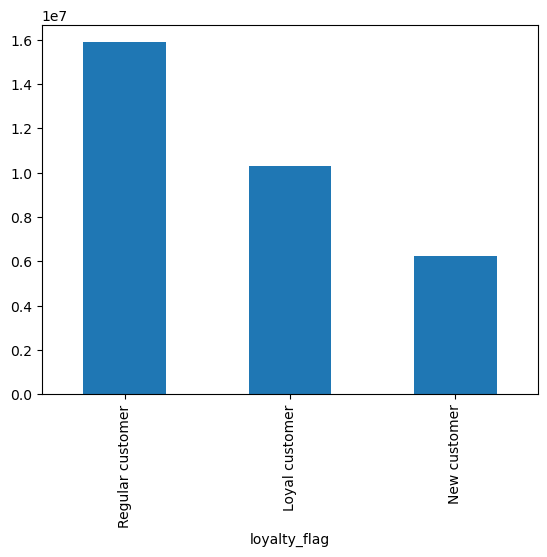

In [92]:
bar = instacart['loyalty_flag'].value_counts().plot.bar()

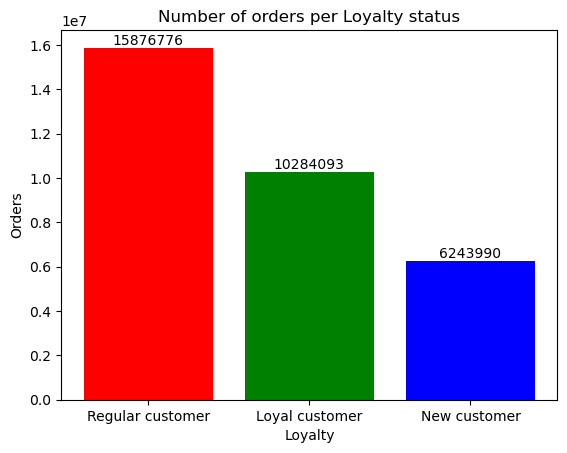

In [89]:
# Data for the chart (use your own data if needed)
loyalty_data = {'Regular customer': 15876776, 'Loyal customer': 10284093, 'New customer': 6243990}

# Create a bar plot
bar = plt.bar(loyalty_data.keys(), loyalty_data.values(), color=['red', 'green', 'blue'])

# Set the labels and title
plt.xlabel('Loyalty')
plt.ylabel('Orders')
plt.title("Number of orders per Loyalty status")

# Add the value on top of each bar
for index, value in enumerate(loyalty_data.values()):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Generate a unique filename
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")  # Creates a unique timestamp
filename = f"orders_per_loyalty_status_{timestamp}.png"  # Filename with timestamp


# Show the plot
plt.show()



### 05. Check whether there’s a difference in expenditure

In [8]:
# Create a random sample by generating a seed
np.random.seed(4)

In [9]:
# Create a dev list based on the data split we want (70/30)
dev = np.random.rand(len(instacart)) <= 0.7

In [10]:
# Split the dataframe into two samples
big = instacart[dev]
small = instacart[~dev]

In [11]:
# Compare the dataframe length to the sum of the big and small samples
len(instacart)

32404859

In [12]:
len(big) + len(small)

32404859

In [13]:
# Reduce the samples to only the columns needed
instacart_2 = small [['order_hour_of_day','prices']]

In [14]:
# Check if the subset of the sample was made properly
instacart_2.head(5)

,order_hour_of_day,prices
0,11,5.8
2,13,20.0
3,14,20.0
6,13,4.4
10,9,12.8


C:\Users\dmksk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dmksk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


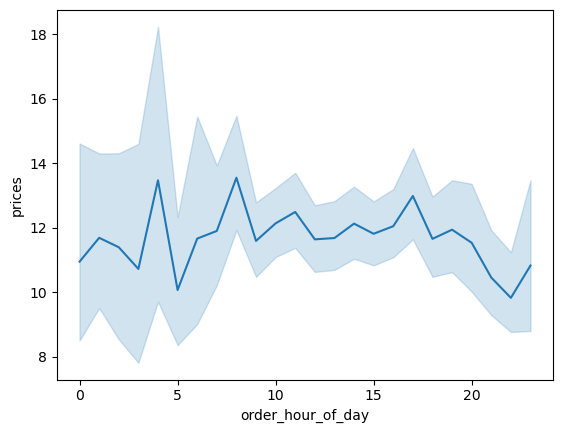

In [15]:
# Create a line chart
line = sns.lineplot(data = instacart_2, x = 'order_hour_of_day',y = 'prices')

### 06.  conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns

In [19]:
# Reduce previously made sample to only the columns needed
instacart_3 = small [['age','n_dependents']]

In [20]:
# Check if the subset of the sample was made properly
instacart_3.head(5)

,age,n_dependents
0,81,1
2,81,1
3,81,1
6,81,1
10,81,1


C:\Users\dmksk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dmksk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


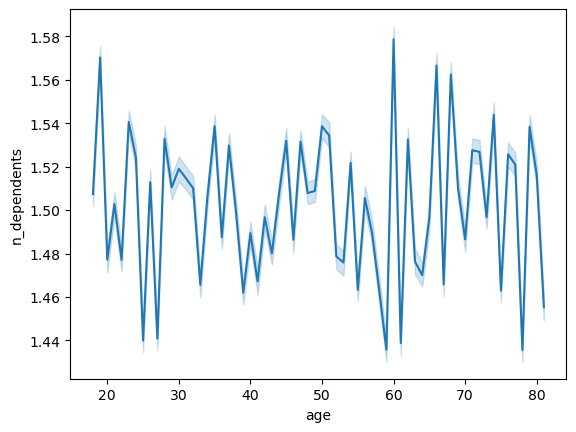

In [22]:
# Create a line chart
line_2 = sns.lineplot(data = instacart_3, x = 'age',y = 'n_dependents')

###### there are no pattern between age and the number of dependents  

### 07.  Explore whether there’s a connection between age and spending power

In [23]:
# Reduce previously made sample to only the columns needed
instacart_4 = small [['age','income']]

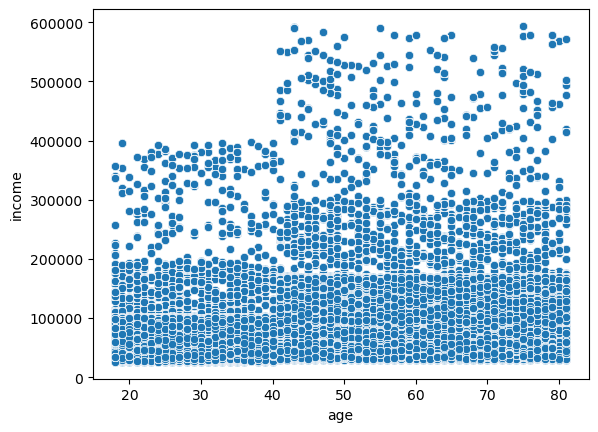

In [24]:
# Create a scatterplot
scatterplot = sns.scatterplot(x = 'age', y = 'income',data = instacart_4)

###### Overall, if you're observing this pattern in a scatter plot or other data visualization, it suggests that while younger age groups (0 to 45) generally earn less, older groups (45 and above) have a broader range of income, indicating diverse career trajectories and financial opportunities. This spread can be influenced by various factors, including career advancement, industry choices, education, and personal ventures.

### 08. Export your visualizations as “.png” files in your relevant project folder

In [93]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_flag_distribution.png'))

In [94]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'change_in_price_over_hours_of_the_day.png'))

In [95]:
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_vs_n_dependants.png'))

In [ ]:
scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'change_in_spending_power_over_age.png'))